In [47]:
import uproot
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import yahist
import itertools
import mplhep as hep


plt.rcParams.update({"figure.facecolor":  (1,1,1,0)})

from utils.analysis import PandasAnalysis

In [2]:
babies = sorted(glob.glob(f"../analysis/studies/vvhjetsel/output/Run2/*.root"))
babies

['../analysis/studies/vvhjetsel/output/Run2/VBSVVH.root']

In [3]:
vbsvvh = PandasAnalysis(
    sig_root_files=babies,
    ttree_name="tree",
    weight_columns=[
        "xsec_sf", "pu_sf", "prefire_sf"
    ]
)

Loading sig babies:   0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]/home/users/jguiang/apps/miniconda3/envs/analysis/lib/python3.9/site-packages/uproot/interpretation/library.py:805: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  out[name] = series[name]
/home/users/jguiang/apps/miniconda3/envs/analysis/lib/python3.9/site-packages/uproot/interpretation/library.py:805: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-frag

/home/users/jguiang/apps/miniconda3/envs/analysis/lib/python3.9/site-packages/uproot/interpretation/library.py:805: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  out[name] = series[name]
/home/users/jguiang/apps/miniconda3/envs/analysis/lib/python3.9/site-packages/uproot/interpretation/library.py:805: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  out[name] = series[name]
/home/users/jguiang/apps/miniconda3/envs/analysis/lib/python3.9/site-packages/uproot/interpretation/library.py:805: PerformanceWarning: DataFrame is highly frag

In [4]:
fatjet_cols = vbsvvh.df.columns.str.contains("fatjet")
genlvl_cols = vbsvvh.df.columns.str.contains("gen_")
weight_cols = np.isin(vbsvvh.df.columns, ["event_weight", "n_fatjets"])
other_cols = np.isin(vbsvvh.df.columns, ["xsec_sf", "pu_sf", "prefire_sf"])
columns = vbsvvh.df.columns[fatjet_cols | genlvl_cols | weight_cols | other_cols]
columns

Index(['fatjet1_pt', 'fatjet1_eta', 'fatjet1_phi', 'fatjet1_wqq',
       'fatjet1_zqq', 'fatjet1_hbb', 'fatjet1_xqq', 'fatjet1_xwqq',
       'fatjet1_xcc', 'fatjet1_xbb', 'fatjet1_match_pdgID', 'fatjet2_pt',
       'fatjet2_eta', 'fatjet2_phi', 'fatjet2_wqq', 'fatjet2_zqq',
       'fatjet2_hbb', 'fatjet2_xqq', 'fatjet2_xwqq', 'fatjet2_xcc',
       'fatjet2_xbb', 'fatjet2_match_pdgID', 'fatjet3_pt', 'fatjet3_eta',
       'fatjet3_phi', 'fatjet3_wqq', 'fatjet3_zqq', 'fatjet3_hbb',
       'fatjet3_xqq', 'fatjet3_xwqq', 'fatjet3_xcc', 'fatjet3_xbb',
       'fatjet3_match_pdgID', 'fatjets_n_matches', 'gen_H_is_matched',
       'gen_H_is_bb', 'gen_H_pt', 'gen_H_eta', 'gen_H_phi',
       'gen_ld_V_is_matched', 'gen_ld_V_is_qq', 'gen_ld_V_pt', 'gen_ld_V_eta',
       'gen_ld_V_phi', 'gen_tr_V_is_matched', 'gen_tr_V_is_qq', 'gen_tr_V_pt',
       'gen_tr_V_eta', 'gen_tr_V_phi', 'gen_is_allhadronic', 'n_fatjets',
       'xsec_sf', 'pu_sf', 'prefire_sf', 'event_weight'],
      dtype='object')

In [5]:
vbsvvh.df = vbsvvh.df[columns]

In [6]:
vbsvvh.df.gen_H_is_bb.sum()

204649

In [7]:
vbsvvh.df.gen_ld_V_is_qq.sum()

326395

In [8]:
vbsvvh.df.gen_tr_V_is_qq.sum()

316594

In [9]:
vbsvvh.df.gen_is_allhadronic.sum()/len(vbsvvh.df)

0.5623329181489347

In [10]:
vbsvvh.df.columns

Index(['fatjet1_pt', 'fatjet1_eta', 'fatjet1_phi', 'fatjet1_wqq',
       'fatjet1_zqq', 'fatjet1_hbb', 'fatjet1_xqq', 'fatjet1_xwqq',
       'fatjet1_xcc', 'fatjet1_xbb', 'fatjet1_match_pdgID', 'fatjet2_pt',
       'fatjet2_eta', 'fatjet2_phi', 'fatjet2_wqq', 'fatjet2_zqq',
       'fatjet2_hbb', 'fatjet2_xqq', 'fatjet2_xwqq', 'fatjet2_xcc',
       'fatjet2_xbb', 'fatjet2_match_pdgID', 'fatjet3_pt', 'fatjet3_eta',
       'fatjet3_phi', 'fatjet3_wqq', 'fatjet3_zqq', 'fatjet3_hbb',
       'fatjet3_xqq', 'fatjet3_xwqq', 'fatjet3_xcc', 'fatjet3_xbb',
       'fatjet3_match_pdgID', 'fatjets_n_matches', 'gen_H_is_matched',
       'gen_H_is_bb', 'gen_H_pt', 'gen_H_eta', 'gen_H_phi',
       'gen_ld_V_is_matched', 'gen_ld_V_is_qq', 'gen_ld_V_pt', 'gen_ld_V_eta',
       'gen_ld_V_phi', 'gen_tr_V_is_matched', 'gen_tr_V_is_qq', 'gen_tr_V_pt',
       'gen_tr_V_eta', 'gen_tr_V_phi', 'gen_is_allhadronic', 'n_fatjets',
       'xsec_sf', 'pu_sf', 'prefire_sf', 'event_weight'],
      dtype='object')

In [11]:
vbsvvh.df

,fatjet1_pt,fatjet1_eta,fatjet1_phi,fatjet1_wqq,fatjet1_zqq,fatjet1_hbb,fatjet1_xqq,fatjet1_xwqq,fatjet1_xcc,fatjet1_xbb,...,gen_tr_V_is_qq,gen_tr_V_pt,gen_tr_V_eta,gen_tr_V_phi,gen_is_allhadronic,n_fatjets,xsec_sf,pu_sf,prefire_sf,event_weight
0,659.0,0.227295,-0.058426,0.997070,0.994629,0.003656,0.926129,0.936554,0.689841,0.061065,...,True,514.0,0.295898,-0.146973,False,2,0.000293,1.0,1.000000,0.000293
1,1191.0,0.205261,-2.744141,0.279053,0.914062,0.999512,0.193606,0.995891,0.995887,0.998349,...,True,480.0,0.804688,-0.343750,True,3,0.000293,1.0,0.987189,0.000290
2,657.0,-0.735596,0.642700,0.999023,0.993164,0.002792,0.982612,0.983496,0.754931,0.044077,...,True,544.0,1.464844,-2.500000,False,2,0.000293,1.0,0.991095,0.000291
3,807.5,1.120850,-2.009766,0.989258,0.988281,0.001365,0.942191,0.949261,0.706775,0.007372,...,True,462.0,-0.213867,1.328125,True,2,0.000293,1.0,1.000000,0.000293
4,775.5,0.551636,0.344421,0.997559,0.993164,0.000978,0.951194,0.955059,0.637973,0.005161,...,True,682.0,0.306641,2.742188,False,3,0.000293,1.0,1.000000,0.000293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334786,1160.0,1.031006,-0.376770,0.937500,0.996094,0.055389,0.931848,0.940405,0.678134,0.052984,...,True,938.0,0.724609,3.062500,True,3,0.000641,1.0,0.996606,0.000639
334787,713.5,0.293335,0.682983,0.999023,0.998535,0.025650,0.987218,0.995137,0.992212,0.327696,...,True,386.0,-0.505859,-2.914062,True,2,0.000641,1.0,1.000000,0.000641
334788,689.0,1.102295,1.529053,0.699219,0.974121,0.000248,0.776313,0.780491,0.078421,0.000109,...,True,430.0,-0.558594,-1.121094,False,2,0.000641,1.0,1.000000,0.000641
334789,1117.0,0.507935,1.090820,0.090515,0.999512,0.998535,0.000737,0.035714,0.035028,0.999972,...,True,822.0,0.009888,-2.710938,True,3,0.000641,1.0,0.998051,0.000640


array([[<AxesSubplot:title={'center':'n_fatjets'}>]], dtype=object)

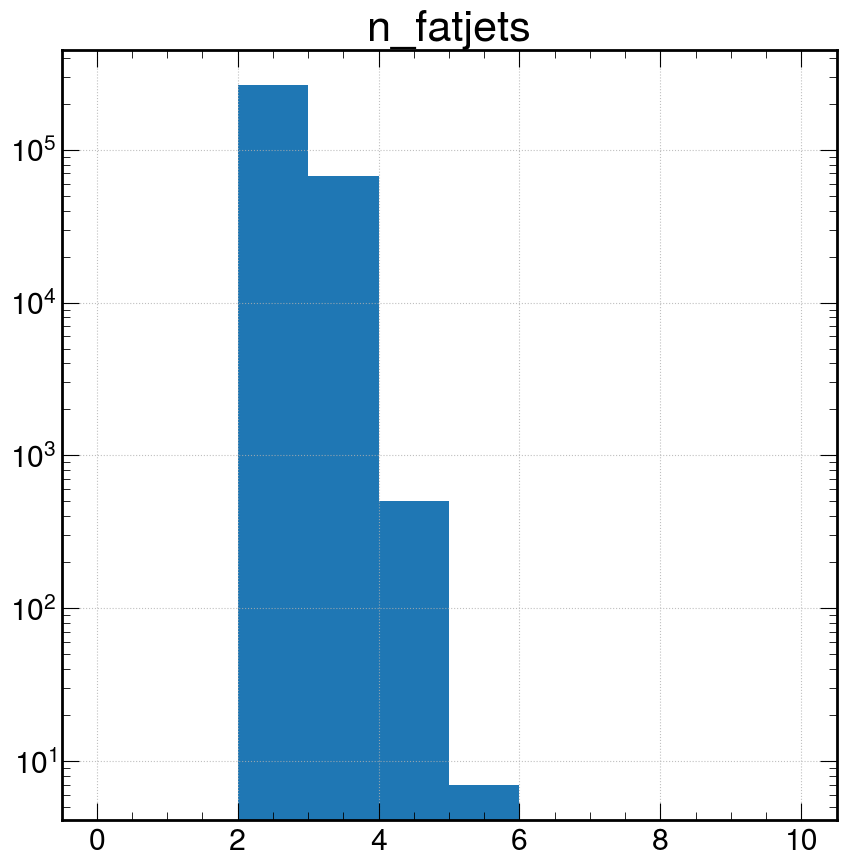

In [12]:
vbsvvh.df.hist("n_fatjets", bins=np.linspace(0, 10, 11), log=True)

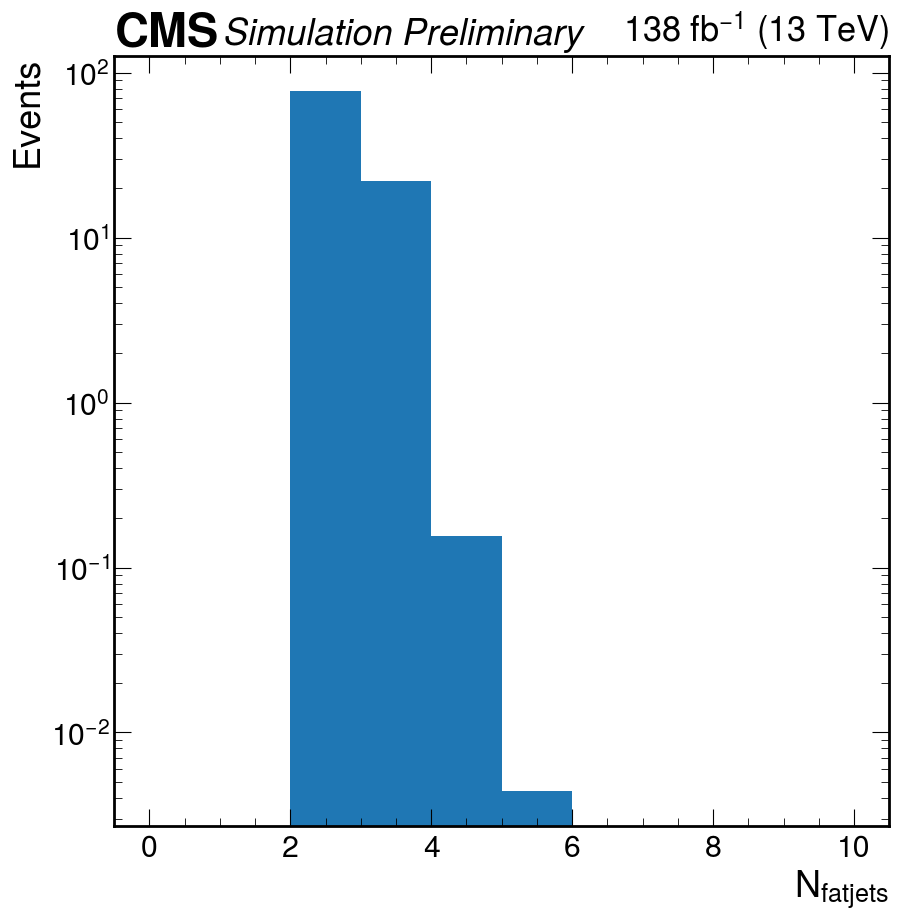

In [85]:
fig, axes = plt.subplots()
axes.hist(
    vbsvvh.df[vbsvvh.df.gen_is_allhadronic].n_fatjets,
    weights=vbsvvh.df[vbsvvh.df.gen_is_allhadronic].event_weight,
    bins=np.linspace(0, 10, 11),
    log=True
);
# Add CMS label
hep.cms.label(
    "Preliminary",
    data=False,
    lumi=138,
    loc=0,
    ax=axes,
)
axes.set_ylabel("Events");
axes.set_xlabel(r"$N_{{fatjets}}$");

array([[<AxesSubplot:title={'center':'fatjets_n_matches'}>]], dtype=object)

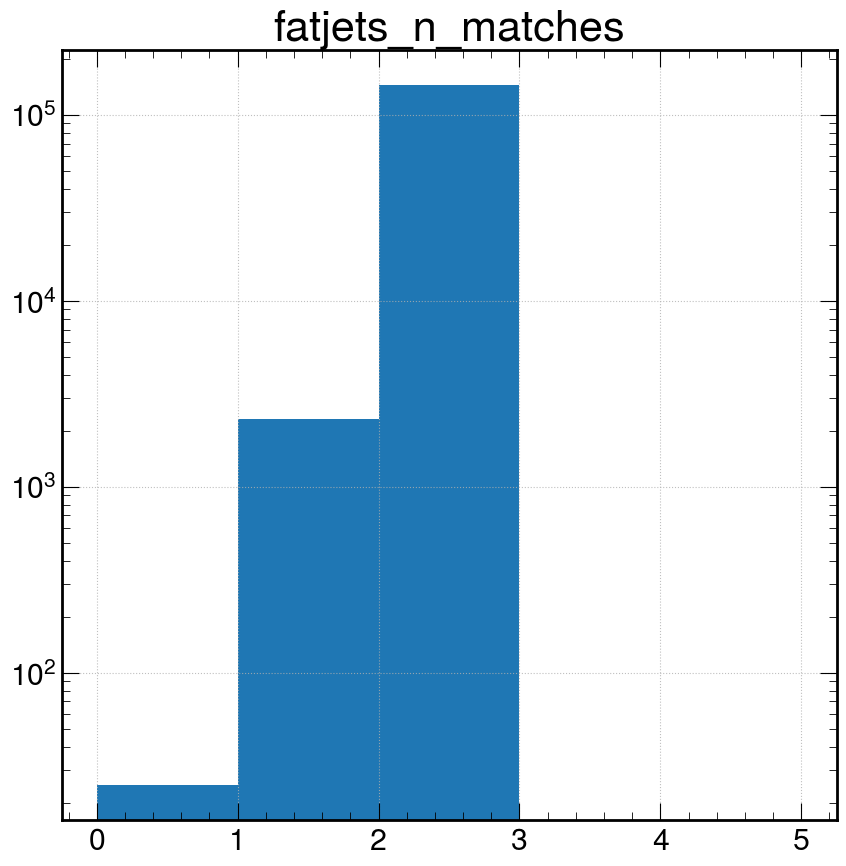

In [14]:
vbsvvh.df[vbsvvh.df.gen_is_allhadronic & (vbsvvh.df.n_fatjets == 2)].hist("fatjets_n_matches", bins=np.linspace(0, 5, 6), log=True)

array([[<AxesSubplot:title={'center':'fatjets_n_matches'}>]], dtype=object)

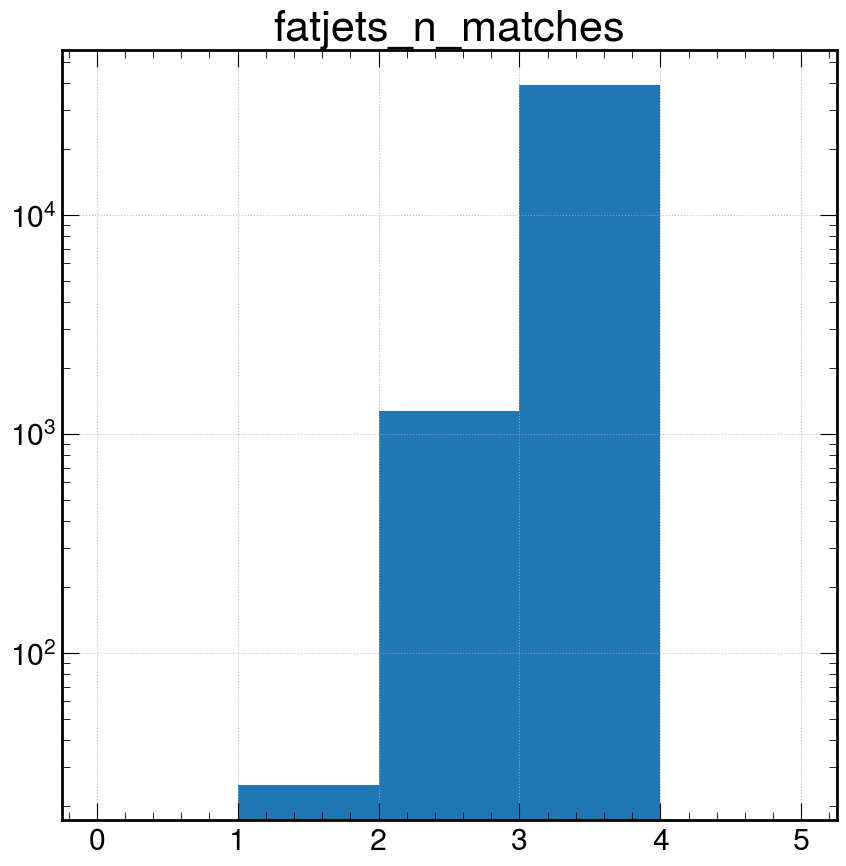

In [15]:
vbsvvh.df[vbsvvh.df.gen_is_allhadronic & (vbsvvh.df.n_fatjets == 3)].hist("fatjets_n_matches", bins=np.linspace(0, 5, 6), log=True)

In [88]:
COLORS = [
    "#364b9a", "#e8eff6", "#6ea5cd", "#97cae1", "#c2e4ee",
    "#eaeccc", "#feda8a", "#fdb366", "#f67e4b", "#dd3c2d"
]

def plot_H_match_scores(selection=None, bins=np.linspace(0, 1, 51), logy=False, norm=False):
    fig, axes = plt.subplots()
    taggers = {
        "hbb":  {"histtype": "stepfilled", "errors": False, "fmt": "o", "hatch": None}, 
        "wqq":  {"histtype": "step",       "errors": False, "fmt": "o", "hatch": None}, 
        "zqq":  {"histtype": "step",       "errors": False, "fmt": "o", "hatch": None}, 
        "xbb":  {"histtype": "step",       "errors": False, "fmt": "o", "hatch": "////"}, 
        "xqq":  {"histtype": "step",       "errors": True,  "fmt": "o", "hatch": None}, 
        "xwqq": {"histtype": "step",       "errors": True,  "fmt": "^", "hatch": None}
    }
    
    df = vbsvvh.df[vbsvvh.df.gen_is_allhadronic]
    if selection:
        df = df[df.eval(selection)]
        
    for tagger_i, tagger in enumerate(taggers.keys()):
        scores = np.concatenate([
            df[df.fatjet1_match_pdgID.abs() == 25][f"fatjet1_{tagger}"].values,
            df[df.fatjet2_match_pdgID.abs() == 25][f"fatjet2_{tagger}"].values,
            df[df.fatjet3_match_pdgID.abs() == 25][f"fatjet3_{tagger}"].values
        ])
        weights = np.concatenate([
            df[df.fatjet1_match_pdgID.abs() == 25].event_weight.values,
            df[df.fatjet2_match_pdgID.abs() == 25].event_weight.values,
            df[df.fatjet3_match_pdgID.abs() == 25].event_weight.values
        ])
        
        hist = yahist.Hist1D(
            scores,
            bins=bins,
            weights=weights,
            label=f"{tagger}",
            color=COLORS[tagger_i]
        )
        if norm:
            hist = hist.normalize()
            
        hist.plot(**taggers[tagger])
        
    # Change axis labels
    axes.set_ylabel("a.u." if norm else "Events");
    axes.set_xlabel("H match ParticleNet score");
    # Add CMS label
    hep.cms.label(
        "Preliminary",
        data=False,
        lumi=138,
        loc=0,
        ax=axes,
    )
    
    if logy:
        axes.set_yscale("log", nonpositive="clip")

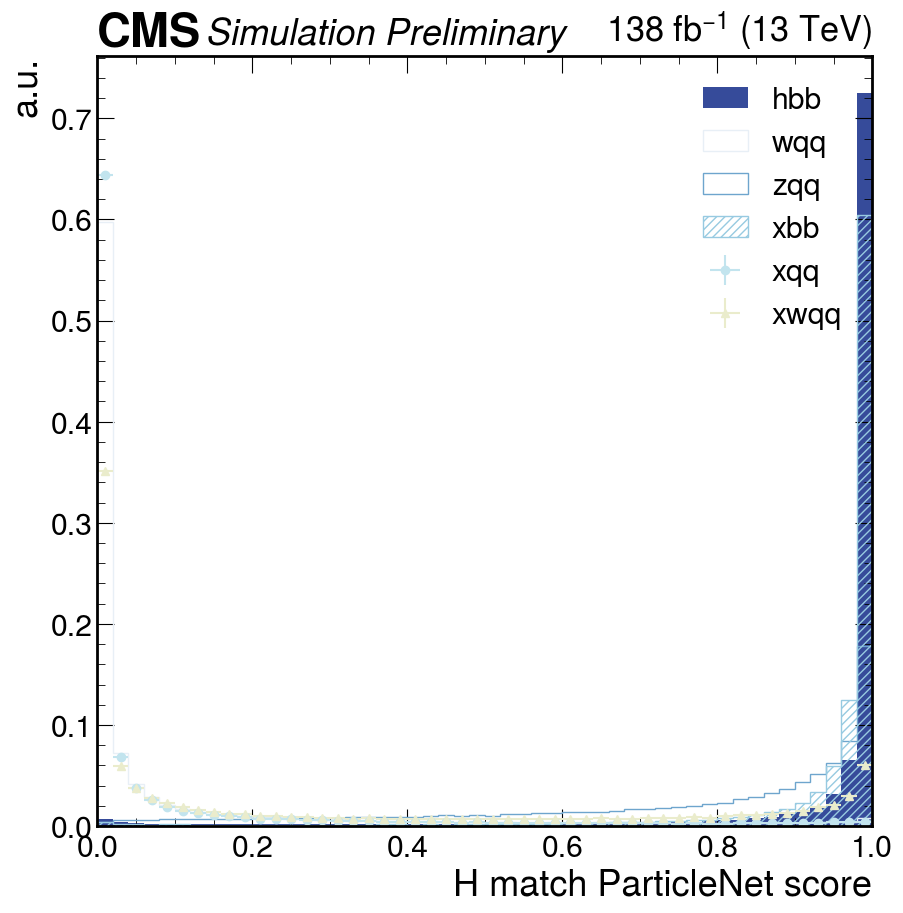

In [89]:
plot_H_match_scores(selection="n_fatjets < 4", logy=False, norm=True)

In [90]:
def plot_V_match_scores(selection=None, bins=np.linspace(0, 1, 51), logy=False, norm=False):
    fig, axes = plt.subplots()
    taggers = {
        "hbb":  {"histtype": "stepfilled", "errors": False, "fmt": "o", "hatch": None}, 
        "wqq":  {"histtype": "step",       "errors": False, "fmt": "o", "hatch": None}, 
        "zqq":  {"histtype": "step",       "errors": False, "fmt": "o", "hatch": None}, 
        "xbb":  {"histtype": "step",       "errors": False, "fmt": "o", "hatch": "//"}, 
        "xqq":  {"histtype": "step",       "errors": True,  "fmt": "o", "hatch": None}, 
        "xwqq": {"histtype": "step",       "errors": True,  "fmt": "^", "hatch": None}
    }
    
    df = vbsvvh.df[vbsvvh.df.gen_is_allhadronic]
    if selection:
        df = df[df.eval(selection)]
        
    for tagger_i, tagger in enumerate(taggers.keys()):
        scores = np.concatenate([
            df[df.fatjet1_match_pdgID.abs() < 25][f"fatjet1_{tagger}"].values,
            df[df.fatjet2_match_pdgID.abs() < 25][f"fatjet2_{tagger}"].values,
            df[df.fatjet3_match_pdgID.abs() < 25][f"fatjet3_{tagger}"].values
        ])
        weights = np.concatenate([
            df[df.fatjet1_match_pdgID.abs() < 25].event_weight.values,
            df[df.fatjet2_match_pdgID.abs() < 25].event_weight.values,
            df[df.fatjet3_match_pdgID.abs() < 25].event_weight.values
        ])
        
        hist = yahist.Hist1D(
            scores,
            bins=bins,
            weights=weights,
            label=f"{tagger}",
            color=COLORS[tagger_i]
        )
        if norm:
            hist = hist.normalize()
            
        hist.plot(**taggers[tagger])
        
    # Change axis labels
    axes.set_ylabel("a.u." if norm else "Events");
    axes.set_xlabel("V match ParticleNet score");
    # Add CMS label
    hep.cms.label(
        "Preliminary",
        data=False,
        lumi=138,
        loc=0,
        ax=axes,
    )
    
    if logy:
        axes.set_yscale("log", nonpositive="clip")

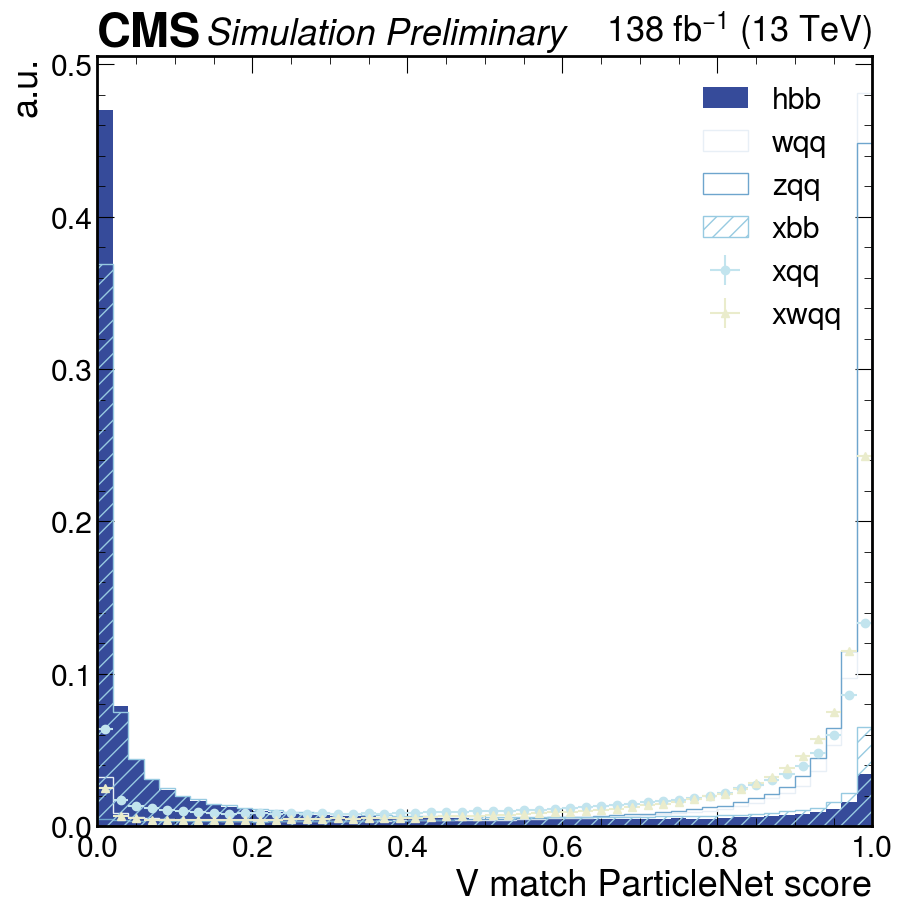

In [91]:
plot_V_match_scores(selection="n_fatjets < 4", logy=False, norm=True)